### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

# Data set for the Problem: Sparkling.csv

# Import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [20, 8]

# Q 1: Read the data as an appropriate Time Series data and plot the data.

In [2]:
df_sparkling = pd.read_csv("Sparkling.csv", parse_dates=True, index_col=0)

In [3]:
df_sparkling

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
...               ...
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

[187 rows x 1 columns]

In [4]:
df_sparkling.shape

(187, 1)

In [5]:
print("Minimum year-month value for Sparkling Wine Sample data :  ",df_sparkling.index.min())

Minimum year-month value for Sparkling Wine Sample data :   1980-01-01 00:00:00


In [6]:
print("Maximum year-month value for Sparkling Wine Sample data :  ",df_sparkling.index.max())

Maximum year-month value for Sparkling Wine Sample data :   1995-07-01 00:00:00


In [7]:
print("Describer for Sparkling Wine Sample data :  ",df_sparkling.describe())

Describer for Sparkling Wine Sample data :            Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000


### Yearly plot for Sparkling wine Sales data

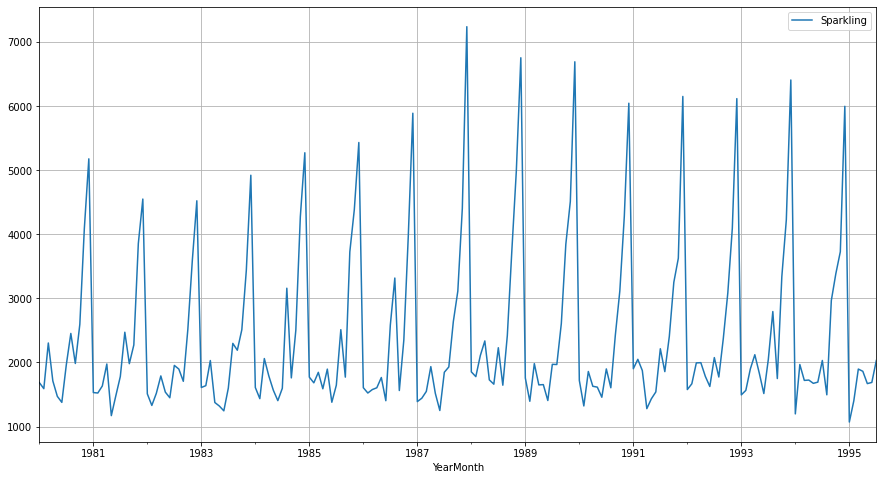

In [8]:
df_sparkling.plot(figsize=(15,8),grid=True);

### Box Plot for Year on year sales data for checking outliers and Comparing Medians for Sparkling wine

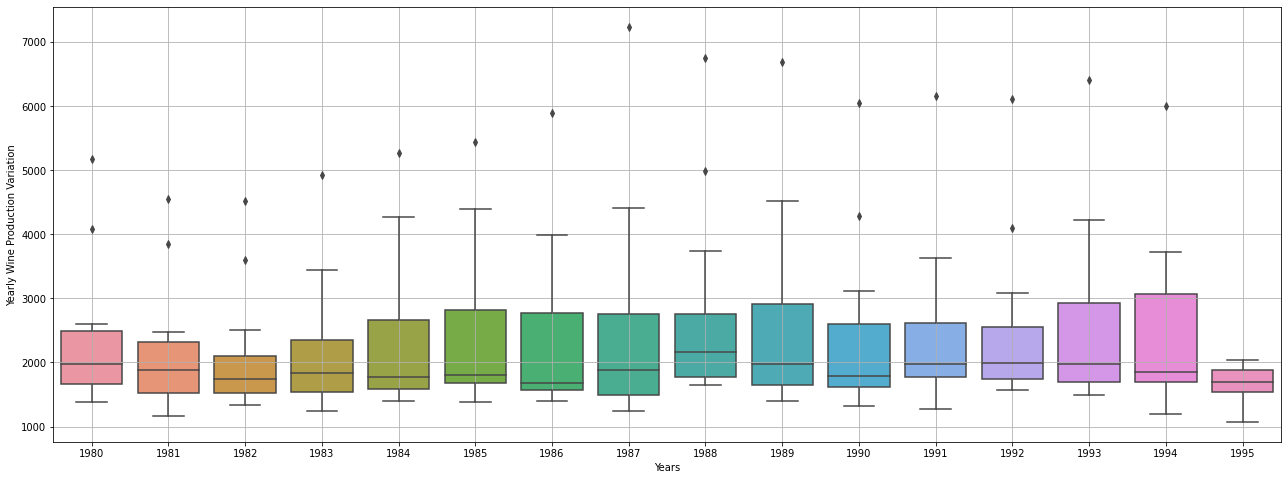

In [9]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_sparkling.index.year, y=df_sparkling["Sparkling"], ax=ax) ##,whis=1.5
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

### Box plot for Wine Sale data for Sparkling wine for Monthly data considering alll years in account

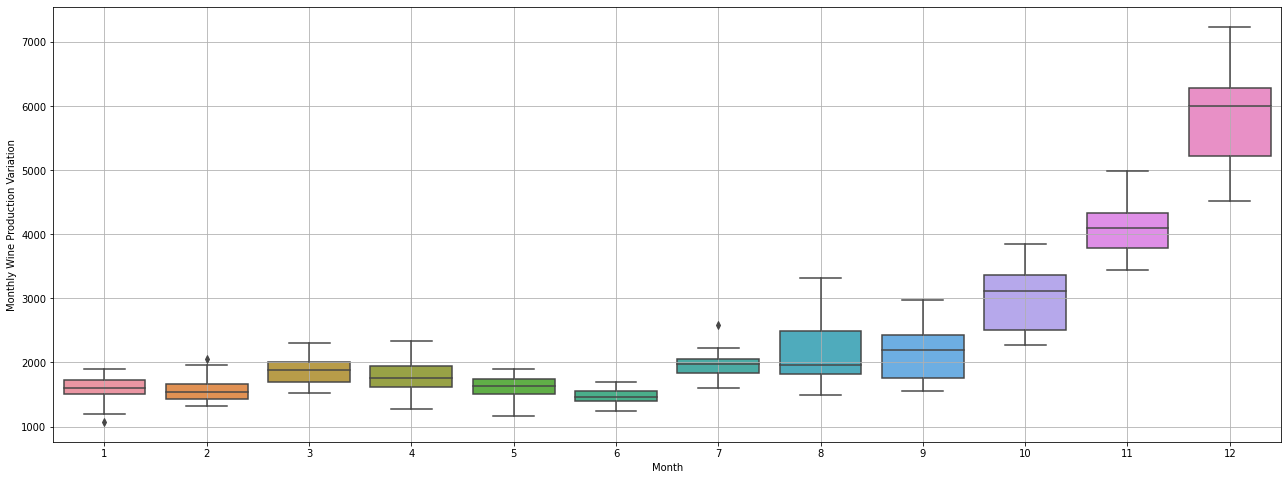

In [10]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_sparkling.index.month, y=df_sparkling["Sparkling"], ax=ax) ##,whis=1.5
plt.grid();
plt.xlabel('Month');
plt.ylabel('Monthly Wine Production Variation');

## Q : 2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Plot a monthplot of the give Time Series.

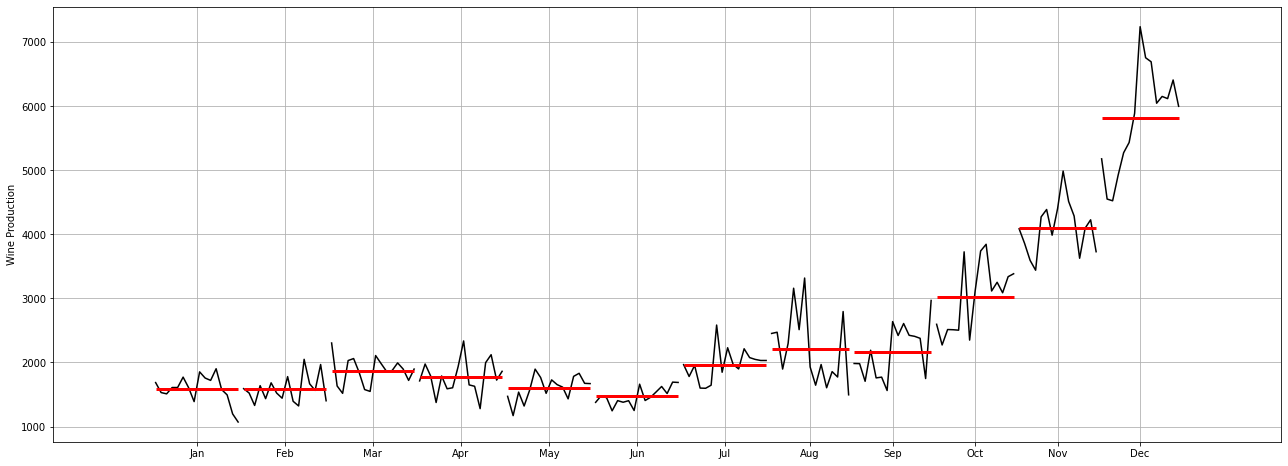

In [11]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_sparkling,ylabel='Wine Production',ax=ax)
plt.grid();

### Plot the Time Series according to different months for different years

In [12]:
yearly_sales_across_months = pd.pivot_table(df_sparkling, values = 'Sparkling', columns = df_sparkling.index.month, 
                                        index = df_sparkling.index.year)

yearly_sales_across_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

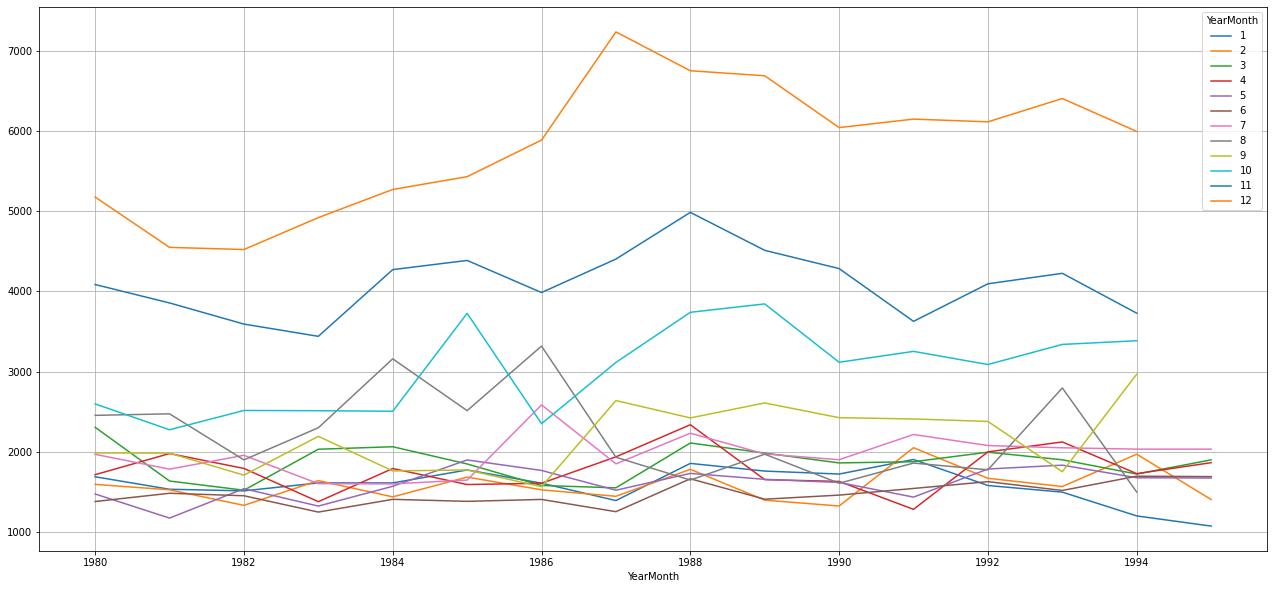

In [13]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

### Plot the average Sales per month and the month on month percentage change of RetailSales.

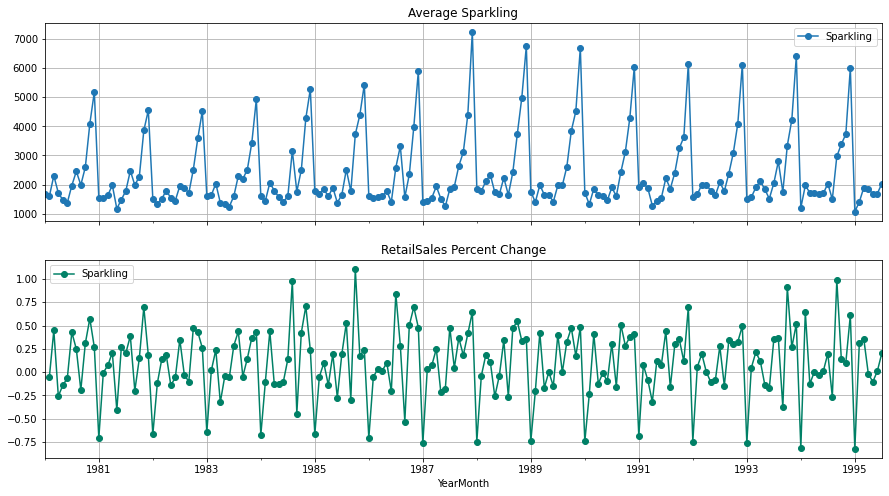

In [14]:
# group by date and get average RetailSales, and precent change
average    = df_sparkling.groupby(df_sparkling.index)["Sparkling"].mean()
pct_change = df_sparkling.groupby(df_sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

### Read this monthly data into a quarterly and yearly format.

### Yearly Plot 
### Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [15]:
df_yearly_sum = df_sparkling.resample('A').sum()
df_yearly_sum.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

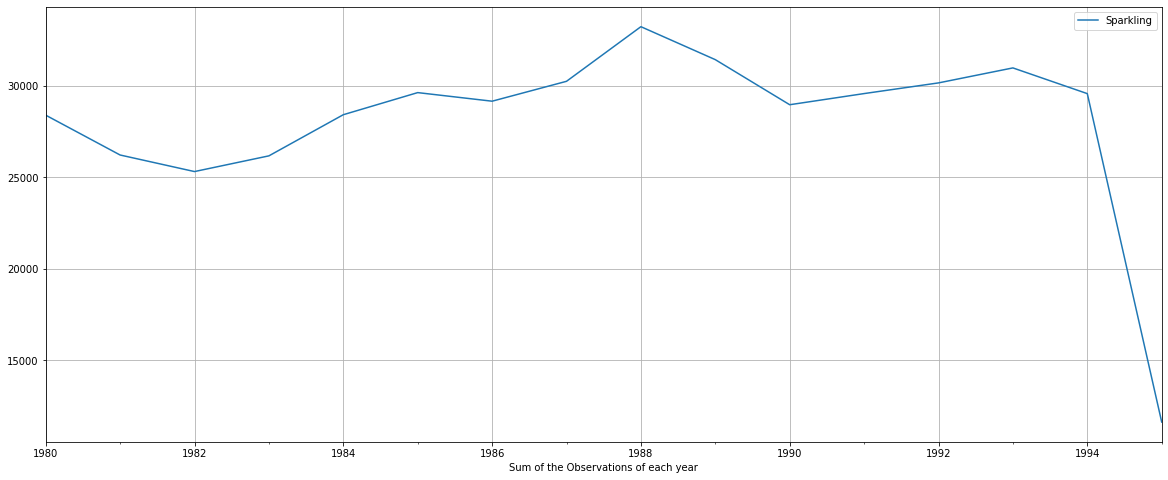

In [16]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [17]:
df_yearly_mean = df_sparkling.resample('Y').mean()
df_yearly_mean.head()

Sparkling
YearMonth              
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

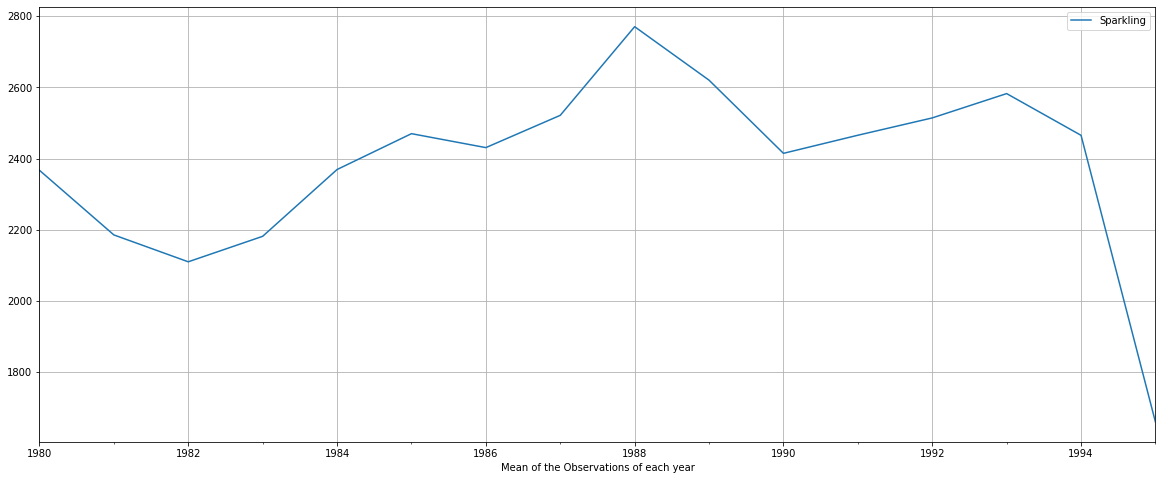

In [18]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

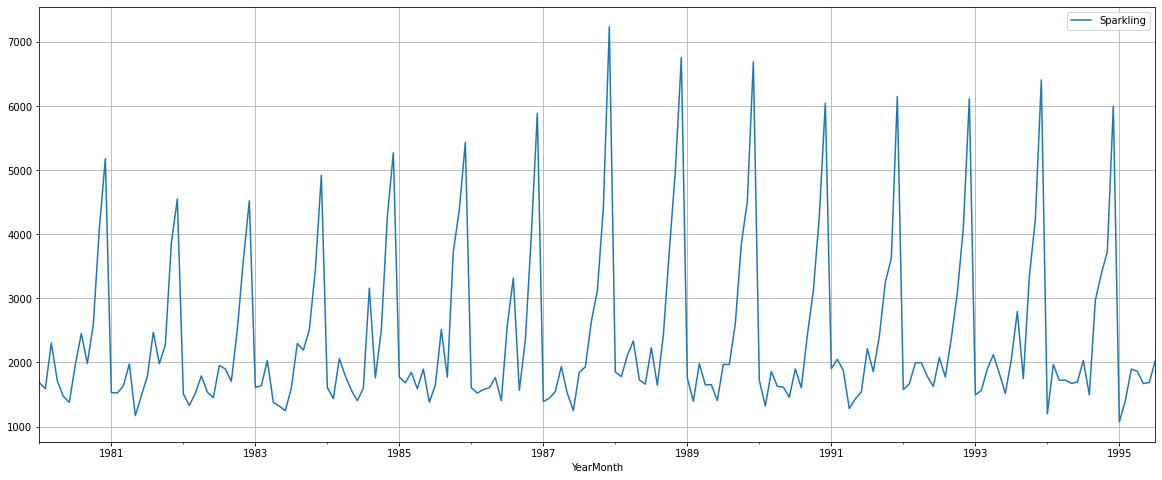

In [19]:
df_sparkling.plot()
plt.grid()

## Quarterly Plot

In [20]:
df_quarterly_sum = df_sparkling.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

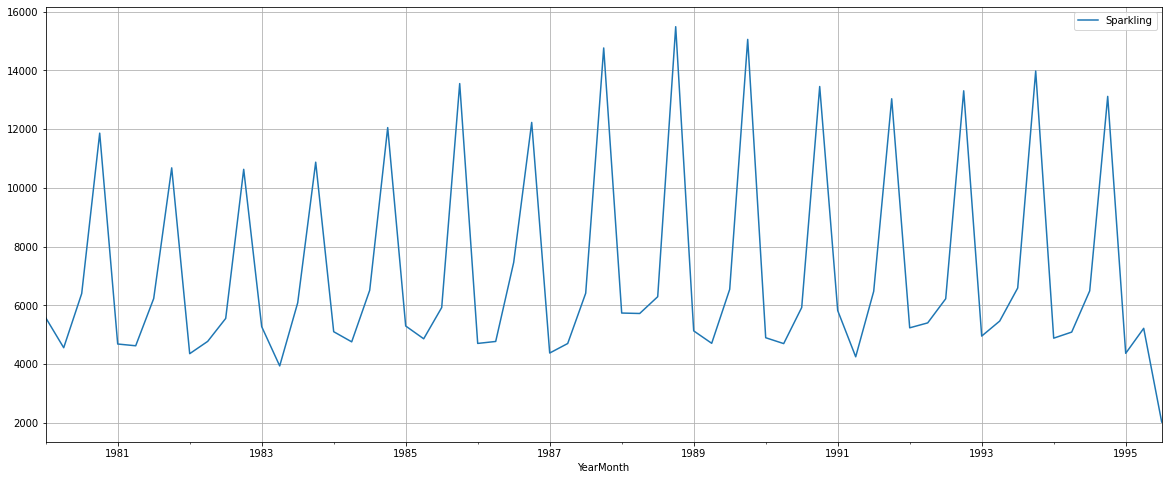

In [21]:
df_quarterly_sum.plot();
plt.grid()

In [22]:
df_quarterly_mean = df_sparkling.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
YearMonth              
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

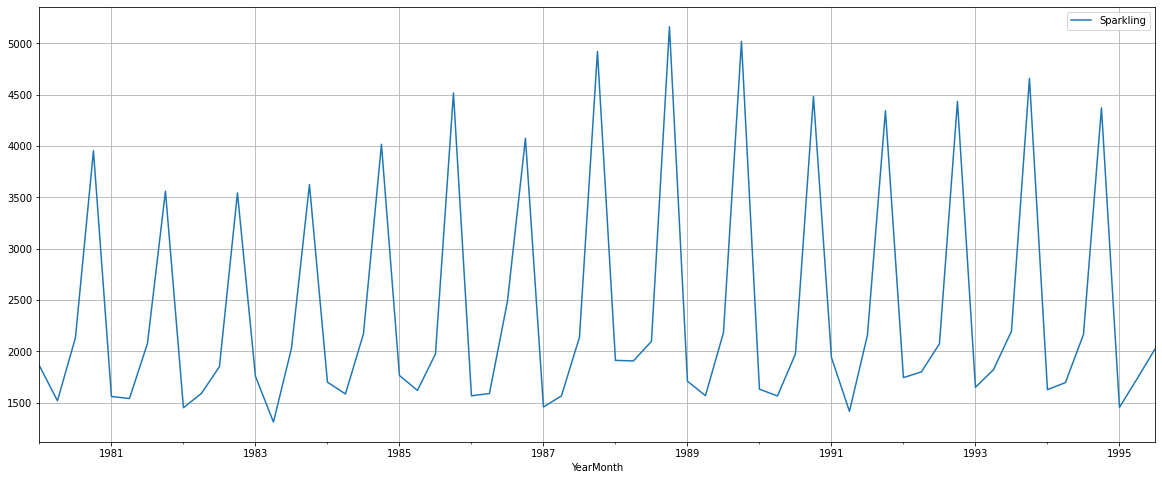

In [23]:
df_quarterly_mean.plot();
plt.grid()

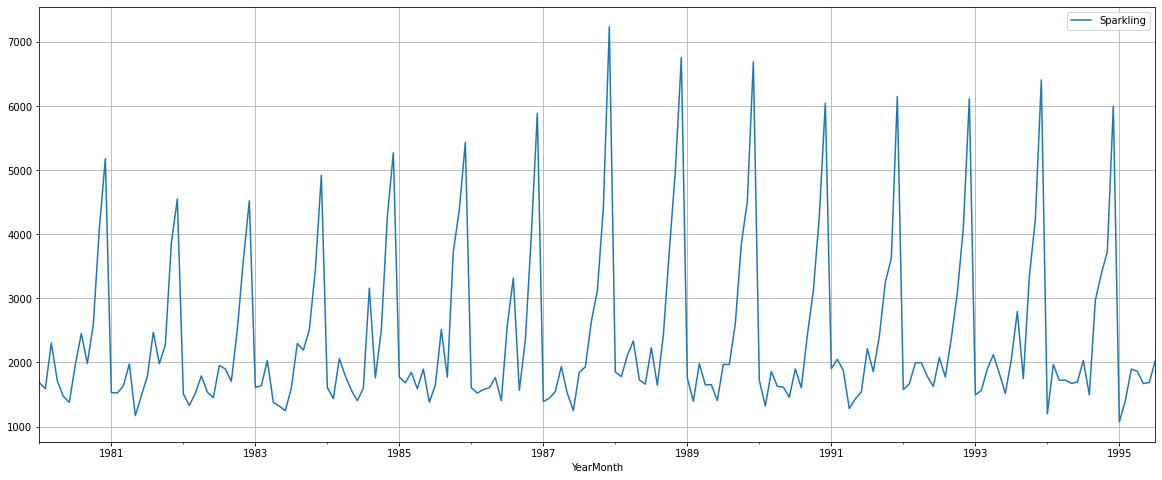

In [24]:
df_sparkling.plot()
plt.grid();

### Daily Plot

Now, let us try to understand the data from a daily perspective.

In [25]:
df_daily_sum = df_sparkling.resample('D').sum()
df_daily_sum

Sparkling
YearMonth            
1980-01-01       1686
1980-01-02          0
1980-01-03          0
1980-01-04          0
1980-01-05          0
...               ...
1995-06-27          0
1995-06-28          0
1995-06-29          0
1995-06-30          0
1995-07-01       2031

[5661 rows x 1 columns]

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

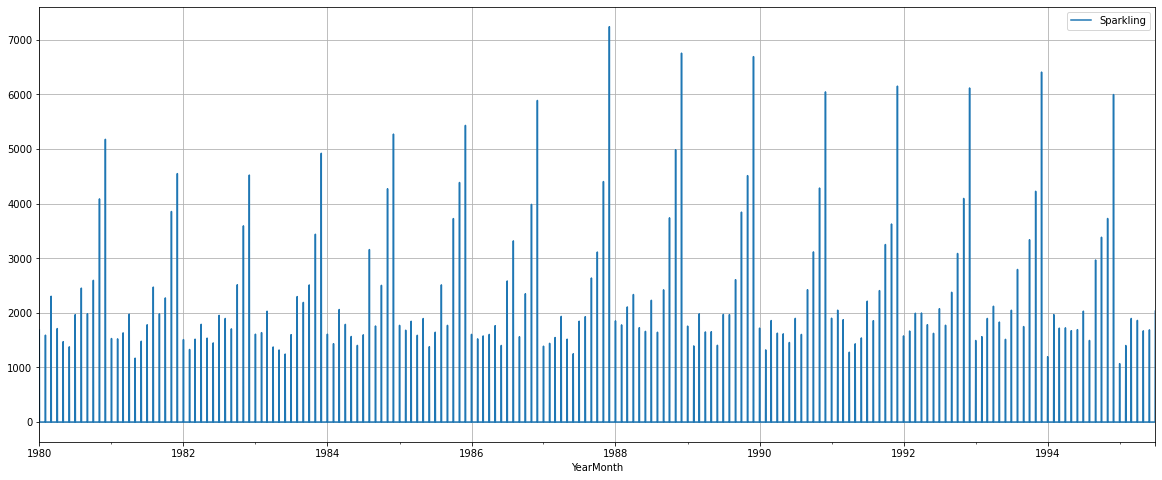

In [26]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

### Decade Plot

In [27]:
df_decade_sum = df_sparkling.resample('10Y').sum()
df_decade_sum

Sparkling
YearMonth            
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

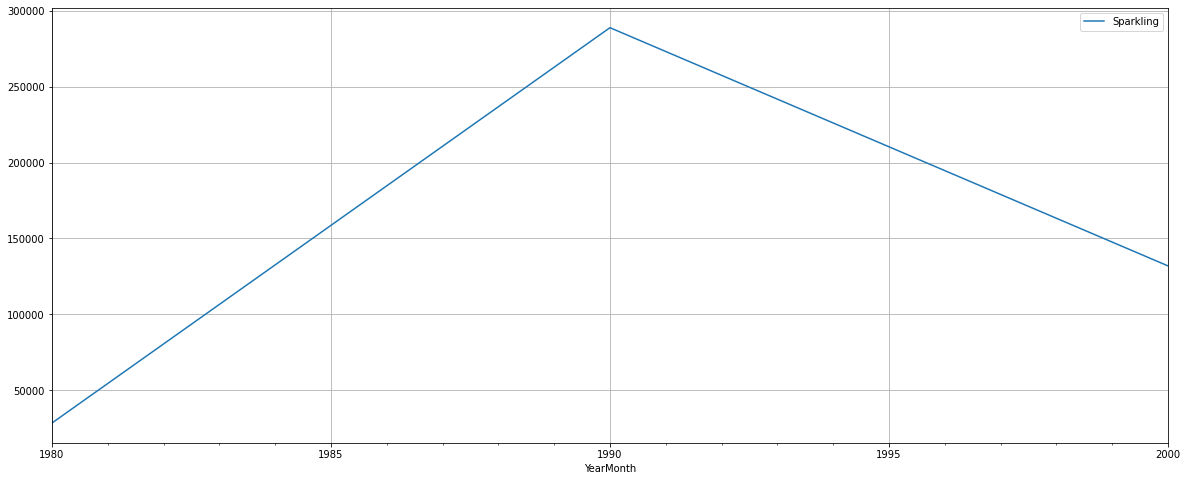

In [28]:
df_decade_sum.plot();
plt.grid()

## Decompose the Time Series

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

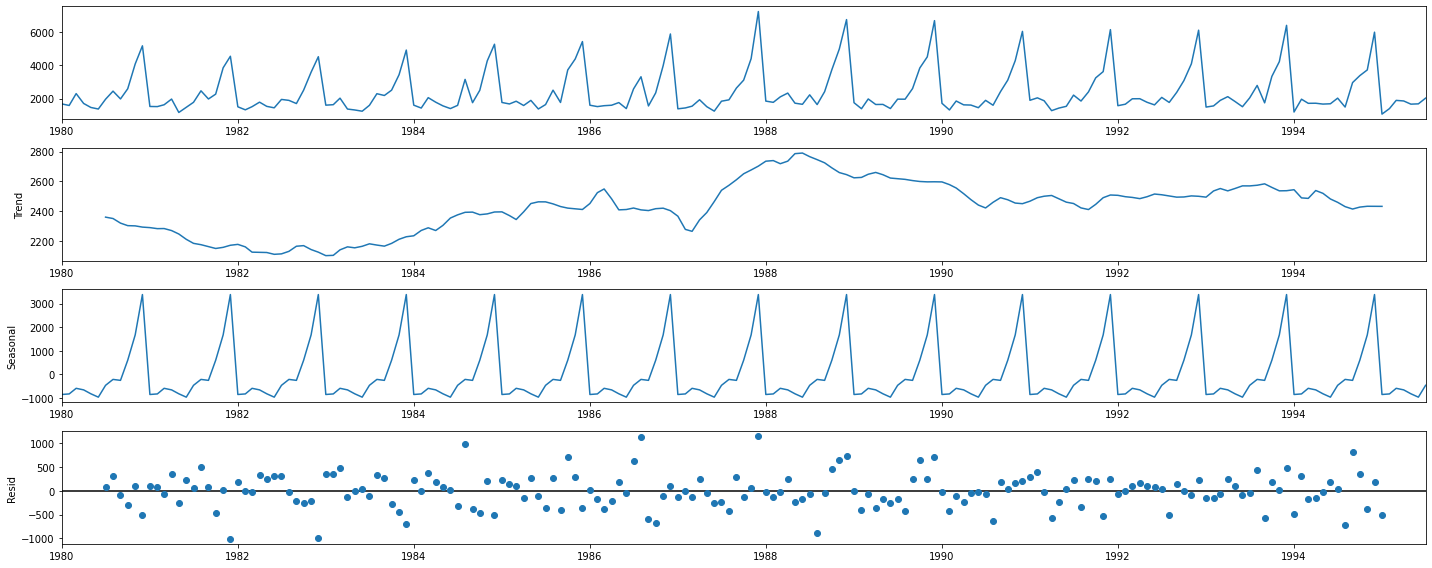

In [30]:
## Deal with missing values , if any
df_sparkling.interpolate(inplace=True)

decomposition = seasonal_decompose(df_sparkling,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [32]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [33]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2431.502265
1980-08-01    2667.332821
1980-09-01    2238.677265
1980-10-01    1996.230043
1980-11-01    2411.932821
1980-12-01    1792.016154
dtype: float64

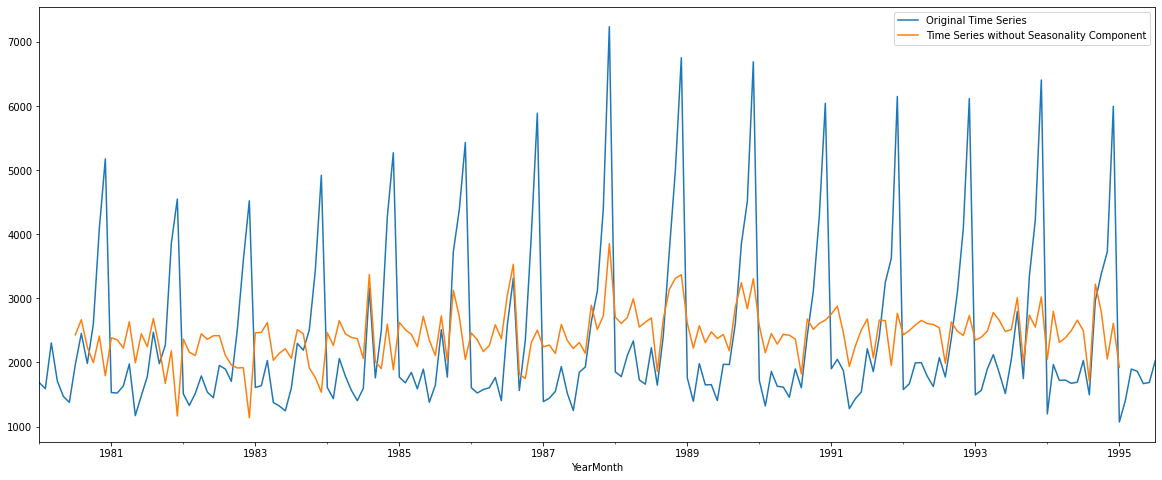

In [34]:
df_sparkling.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [35]:
df_sparkling.isnull().sum()

Sparkling    0
dtype: int64

### multiplicative Model for Sparkling data problem

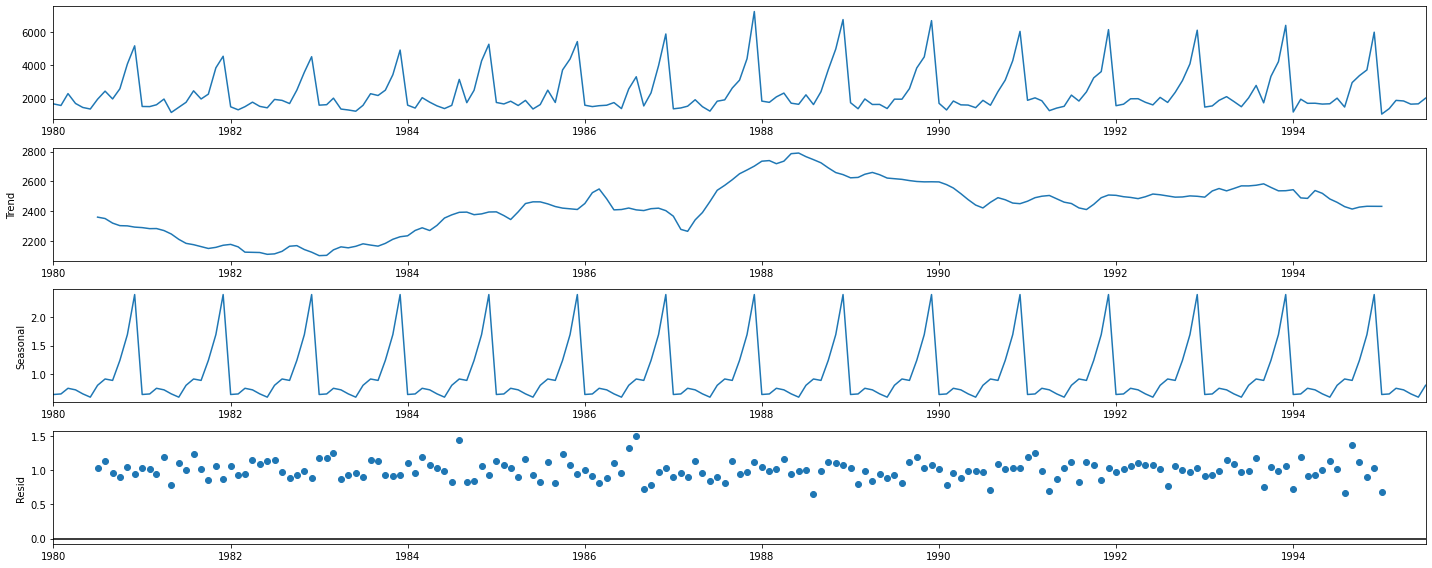

In [36]:
decomposition = seasonal_decompose(df_sparkling,model='multiplicative')
decomposition.plot();

Since Residual is more close to a single line, we would choose Multiplicative Decomposition over Additive decomposion

## Q 3: Split the data into training and test. The test data should start in 1991.

In [37]:
train = df_sparkling[df_sparkling.index<'1991'] 
test  = df_sparkling[df_sparkling.index>='1991']

In [38]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [39]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



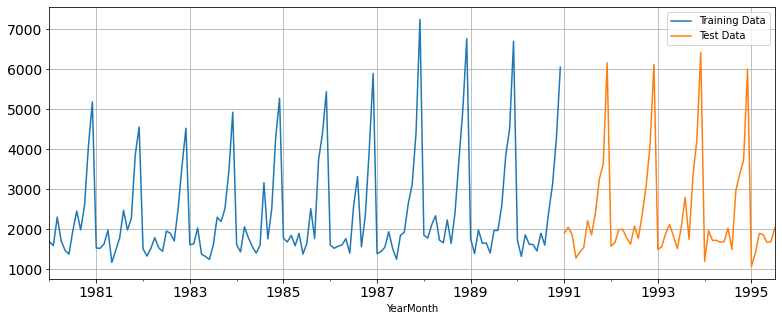

In [40]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

## Q : 4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [41]:
df_sparkling_2=df_sparkling.copy()

In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [43]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [44]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯  to build the model on the training data and test the model on the test data.

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

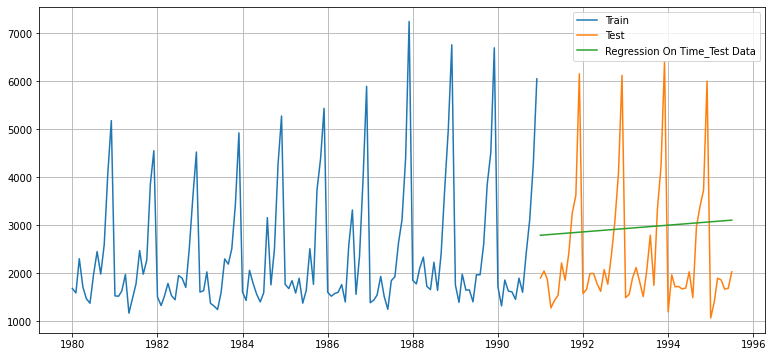

In [48]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics

In [49]:
from sklearn import metrics

### Model Evaluation

In [50]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [51]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

## Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡

In [52]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [53]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

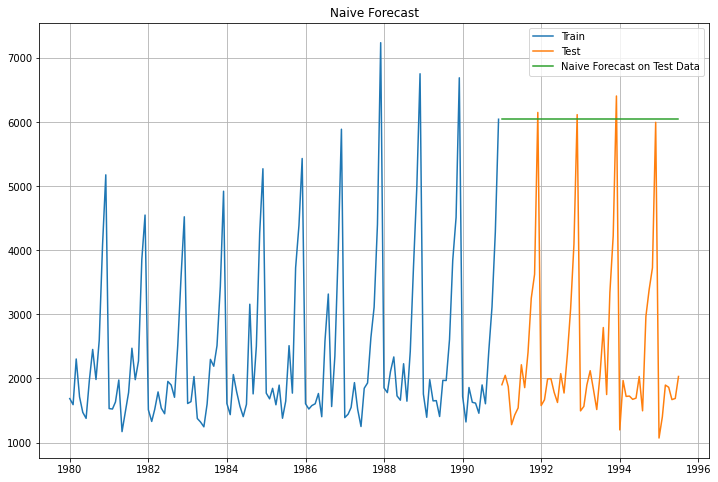

In [54]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [55]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [56]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

### Method 3: Simple Average

In [57]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [58]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

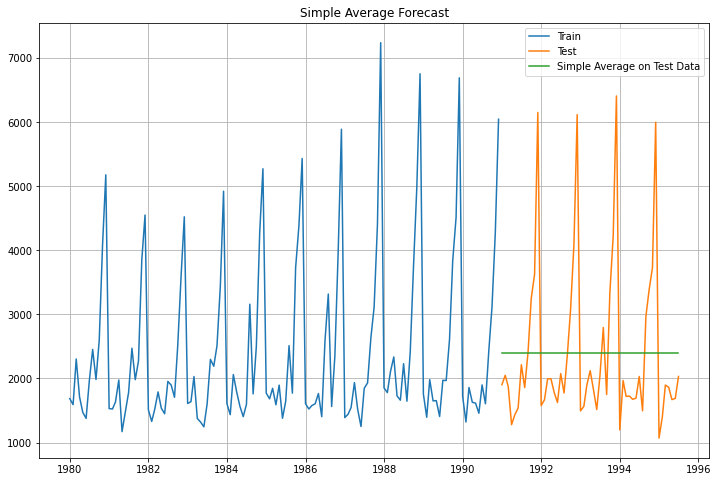

In [59]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [60]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [61]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

### Method 4: Moving Average(MA)

### For Moving Average, we are going to average over the entire data

In [62]:
MovingAverage = df_sparkling.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

### Trailing moving averages

In [63]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()

MovingAverage.head()

Sparkling  Trailing_2   Trailing_3  Trailing_4  Trailing_6
YearMonth                                                             
1980-01-01       1686         NaN          NaN         NaN         NaN
1980-02-01       1591      1638.5          NaN         NaN         NaN
1980-03-01       2304      1947.5  1860.333333         NaN         NaN
1980-04-01       1712      2008.0  1869.000000     1823.25         NaN
1980-05-01       1471      1591.5  1829.000000     1769.50         NaN

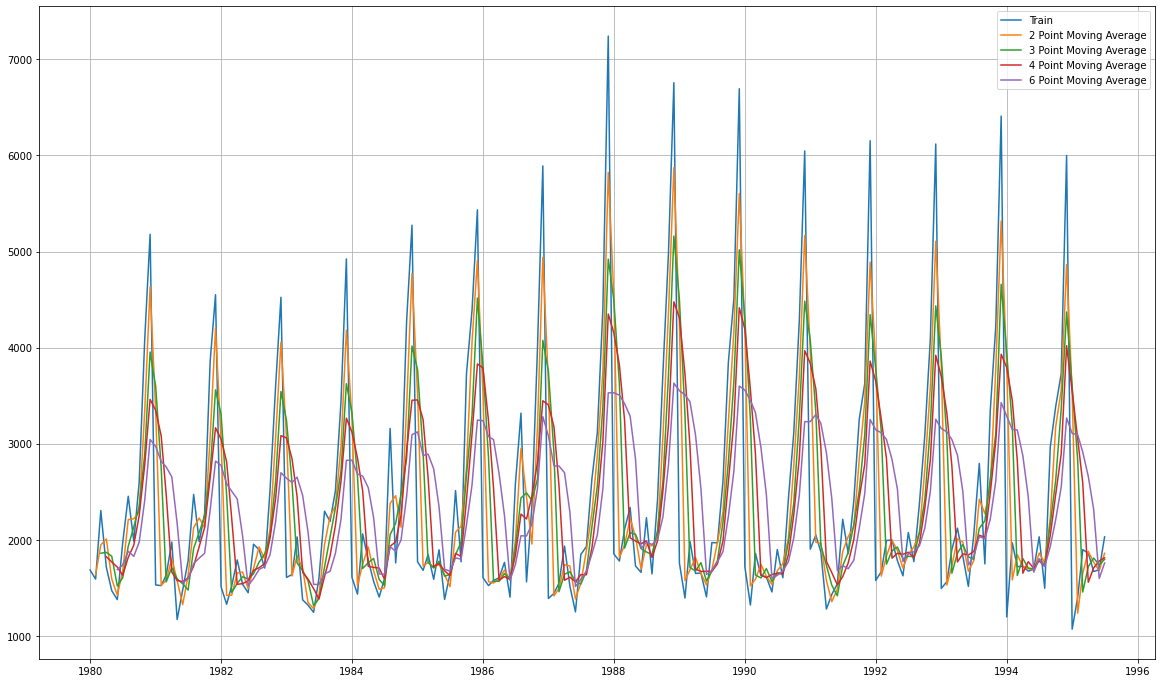

In [64]:
## Plotting on the whole data
plt.figure(figsize=(20,12))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [65]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df_sparkling.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[df_sparkling.index>='1991']

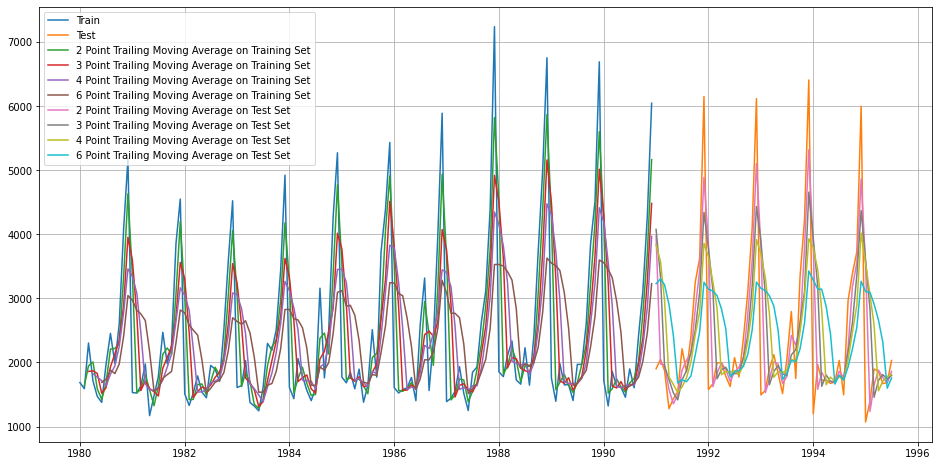

In [66]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'],label = '4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [67]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_Mov_Avg_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Mov_Avg_test_2))

## Test Data - RMSE --> 3 point Trailing MA

rmse_Mov_Avg_test_3 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Mov_Avg_test_3))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_Mov_Avg_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Mov_Avg_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_Mov_Avg_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_Mov_Avg_test_6))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 1028.606
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927


In [68]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_Mov_Avg_test_2,rmse_Mov_Avg_test_3
                                          ,rmse_Mov_Avg_test_4,rmse_Mov_Avg_test_6]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage'
                                   ,'4pointTrailingMovingAverage','6pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
3pointTrailingMovingAverage  1028.605756
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428

### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

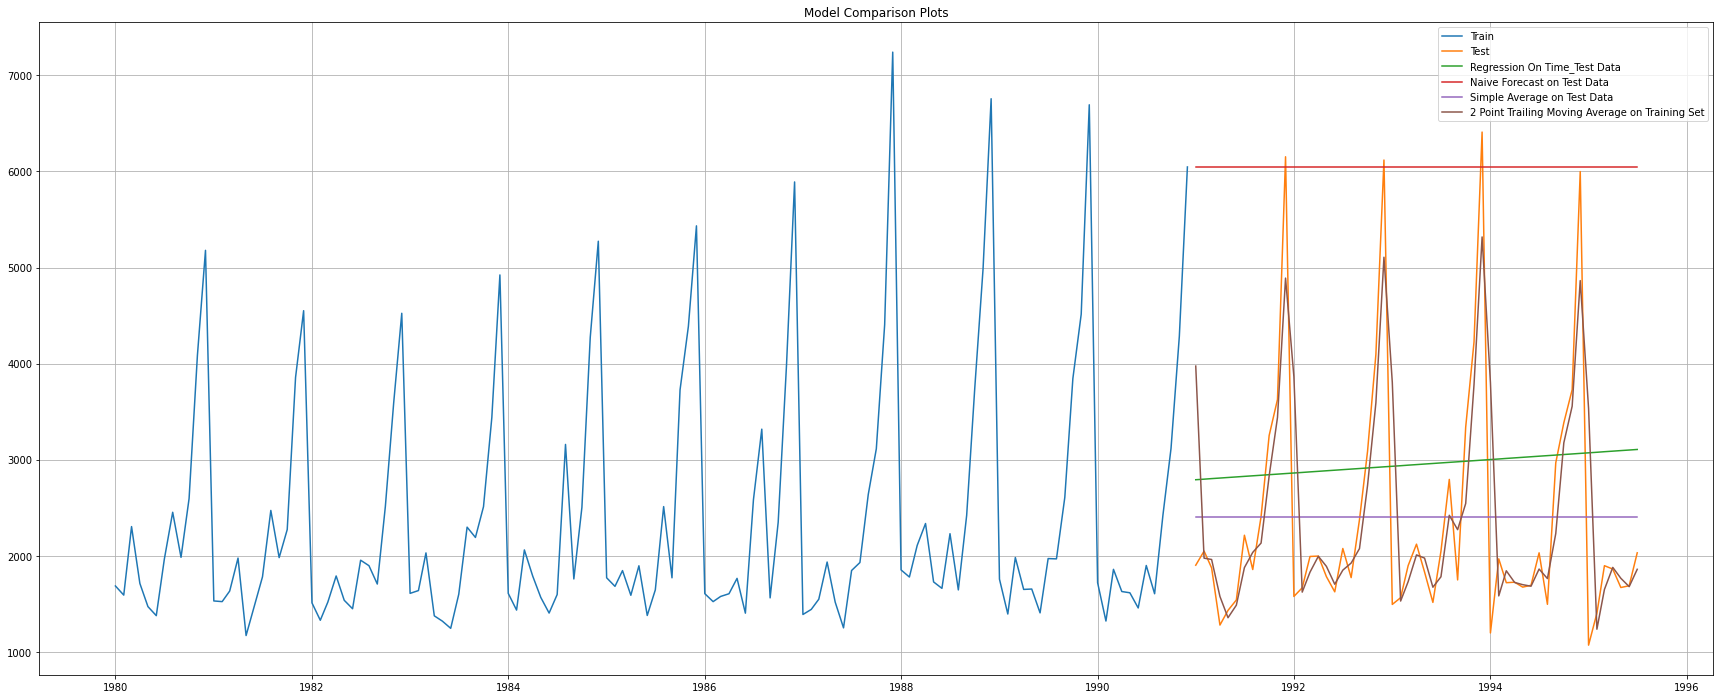

In [69]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [70]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [71]:
SES_train = train.copy()
SES_test = test.copy()

In [72]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [74]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [75]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339

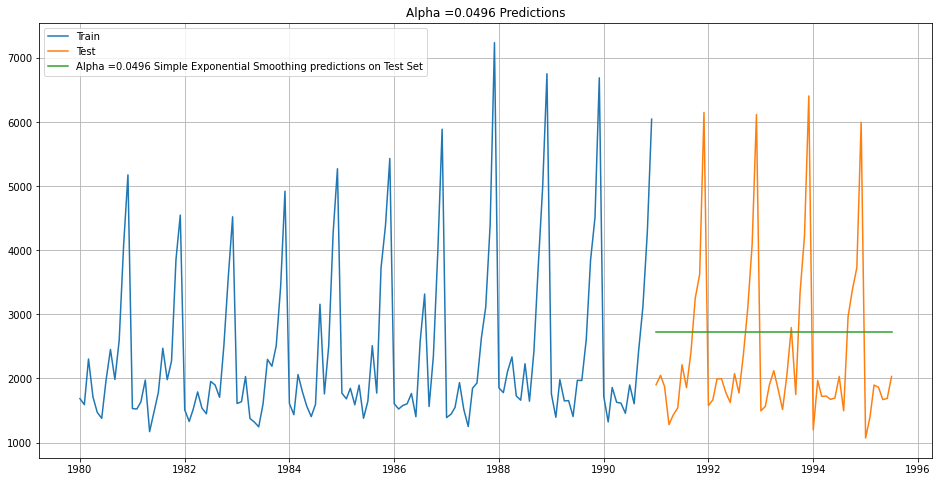

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

### Model Evaluation for  𝛼  = 0.04960 : Simple Exponential Smoothing

In [77]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.04960 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.04960 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [78]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                         1389.135175
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2pointTrailingMovingAverage               813.400684
3pointTrailingMovingAverage              1028.605756
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
Alpha=0.0496,SimpleExponentialSmoothing  1316.034674

Setting different alpha values.

The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [79]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [80]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [81]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
1           0.02  1328.406554  1279.495201
0           0.01  1361.997529  1281.032699
2           0.03  1318.846031  1293.110073
3           0.04  1317.138929  1305.462953
4           0.05  1318.429335  1316.411742
..           ...          ...          ...
94          0.95  1363.586057  3778.432623
95          0.96  1365.349793  3796.048620
96          0.97  1367.179935  3813.437370
97          0.98  1369.077807  3830.602869
98          0.99  1371.044831  3847.548965

[99 rows x 3 columns]

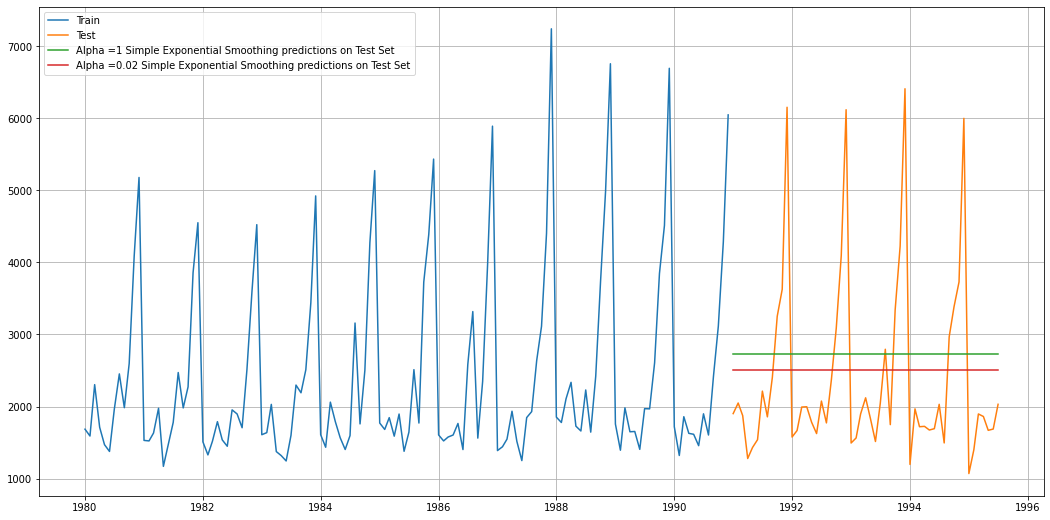

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [83]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.02,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                         1389.135175
NaiveModel                               3864.279352
SimpleAverageModel                       1275.081804
2pointTrailingMovingAverage               813.400684
3pointTrailingMovingAverage              1028.605756
4pointTrailingMovingAverage              1156.589694
6pointTrailingMovingAverage              1283.927428
Alpha=0.0496,SimpleExponentialSmoothing  1316.034674
Alpha=0.02,SimpleExponentialSmoothing    1279.495201

### Method 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [84]:
DES_train = train.copy()
DES_test = test.copy()

In [85]:
model_DES = Holt(DES_train['Sparkling'])

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [86]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [87]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [88]:
resultsDf_7.sort_values(by="Test RMSE")

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
10           0.2          0.1  1418.041591   3611.763322
2            0.1          0.3  1445.762015   4293.084674
20           0.3          0.1  1431.169601   5908.185554
..           ...          ...          ...           ...
98           1.0          0.9  1985.368445  57823.177011
79           0.8          1.0  1872.711054  57990.117908
89           0.9          1.0  1948.020916  59008.254331
99           1.0          1.0  2077.672157  59877.076519
19           0.2          1.0  2325.013004  60749.773505

[100 rows x 4 columns]

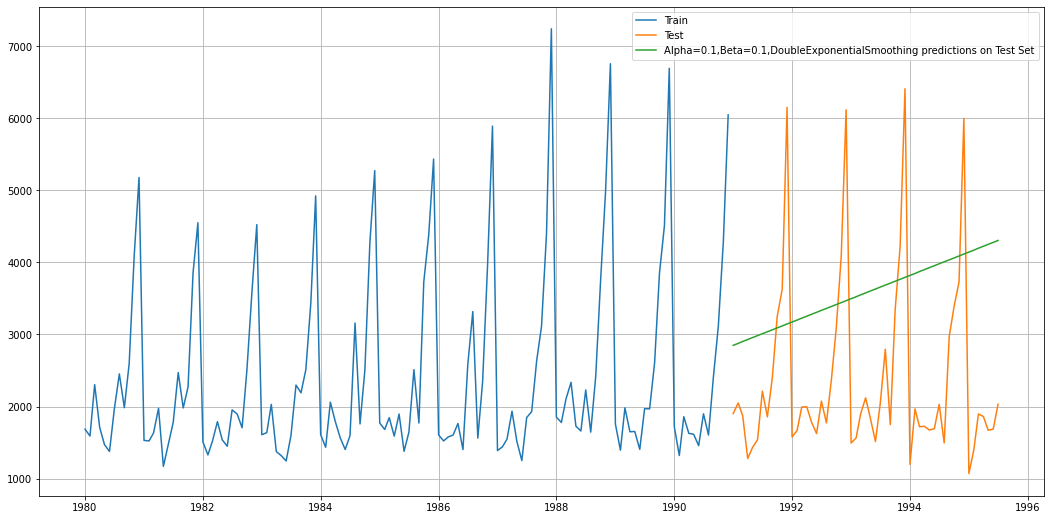

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [90]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                               1389.135175
NaiveModel                                     3864.279352
SimpleAverageModel                             1275.081804
2pointTrailingMovingAverage                     813.400684
3pointTrailingMovingAverage                    1028.605756
4pointTrailingMovingAverage                    1156.589694
6pointTrailingMovingAverage                    1283.927428
Alpha=0.0496,SimpleExponentialSmoothing        1316.034674
Alpha=0.02,SimpleExponentialSmoothing          1279.495201
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1778.564670

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [91]:
TES_train = train.copy()
TES_test = test.copy()

In [92]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [93]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [94]:
model_TES_autofit.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1587.685845
1991-02-01       2049   1356.590237
1991-03-01       1874   1763.121866
1991-04-01       1279   1656.379813
1991-05-01       1432   1542.186697

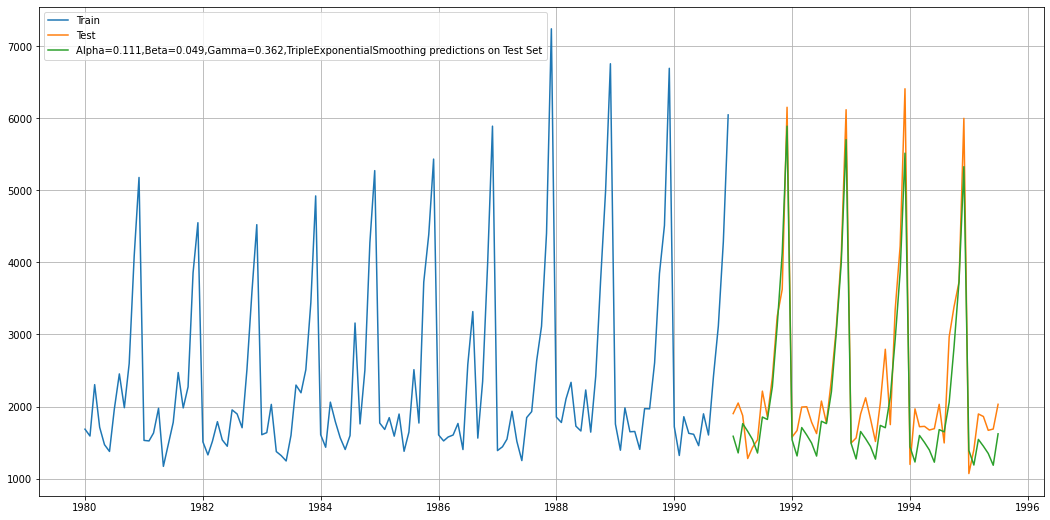

In [96]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [97]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.049,Gamma=0.362, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 403.706


In [98]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
3pointTrailingMovingAverage                         1028.605756
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228

In [99]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [100]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',round(i,1),round(j,1),round(k,1)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',round(i,1),round(j,1),round(k,1)] = model_TES_alpha_i_j_k.forecast(steps=55)
            
            rmse_model8_train = np.round(metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',round(i,1),round(j,1),round(k,1)],squared=False),2)
            
            rmse_model8_test = np.round(metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',round(i,1),round(j,1),round(k,1)],squared=False),2)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,
                                                  'Beta Values':j,
                                                  'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,
                                                  'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [101]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
244           0.4          0.1           0.2      384.47     317.43
172           0.3          0.2           0.2      388.54     329.04
162           0.3          0.1           0.1      388.22     337.08
90            0.2          0.2           0.1      398.48     340.19
326           0.5          0.1           0.3      396.60     345.91

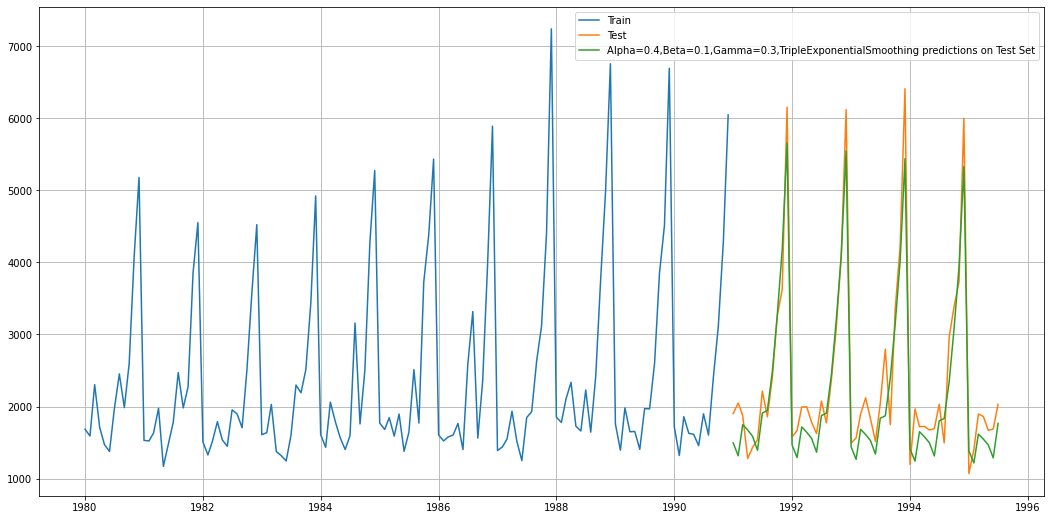

In [102]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.4, 0.1, 0.3], label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [103]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing'])

FInal_results = pd.concat([resultsDf, resultsDf_8_3])
FInal_results

Test RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804
2pointTrailingMovingAverage                          813.400684
3pointTrailingMovingAverage                         1028.605756
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.430000

In [104]:
print('Sorted by RMSE values on the Test Data:','\n',)
FInal_results.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.430000
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
2pointTrailingMovingAverage                          813.400684
3pointTrailingMovingAverage                         1028.605756
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
6pointTrailingMovingAverage                         1283.927428
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674
RegressionOnTime                                    1389.135175
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
NaiveModel                                          3864.279352

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters  𝛼  = 0.4 ,  𝛽  = 0.1 and  𝛾  = 0.3.

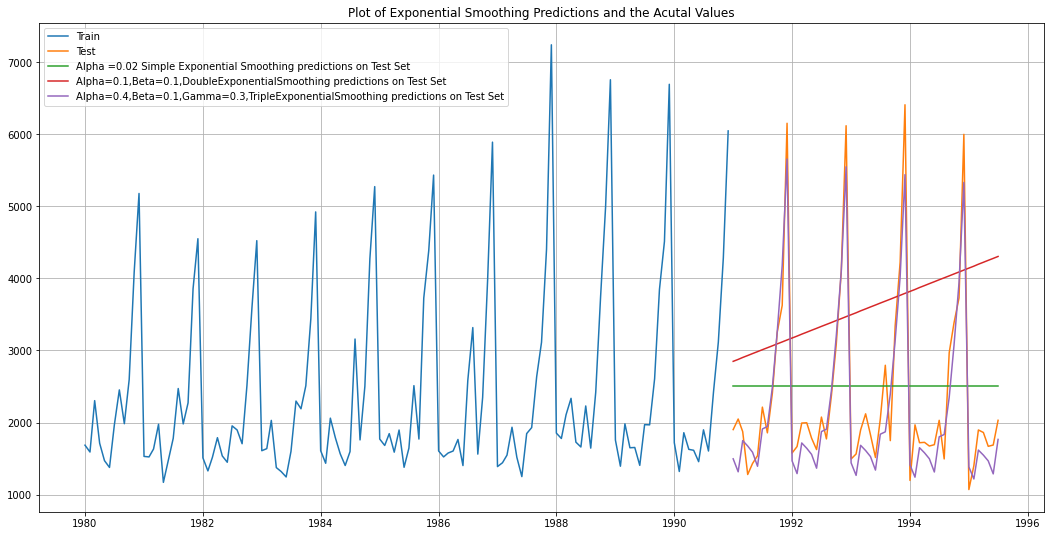

In [105]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.4, 0.1, 0.3], label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 1 model which gave us the best accuracy (least RMSE).

## Q 5: Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05.

### AUTO REGRESSIVE Models
### Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models.

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970.

ARMA models are basically regression models; auto-regression means regression of a variable on itself measured at different time periods.

The main assumption of AR model is that the time series data is stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

http://people.duke.edu/~rnau/411diff.htm

When the time series data is not stationary, then we convert the non-stationary data before applying AR models.

### Lags
Taking the difference between consecutive observations is called a lag-1 difference.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

### White noise of the residuals:

White noise is a process of residuals  ϵt  that are uncorrelated and follow normal distribution with mean 0 and constant standard deviation. In AR models, one of the main assumptions is the errors follow a white noise.

### Auto-Regressive (AR) Models
Auto-Regression is a regression of a variable on itself measured at different time points. Auto-Regressive model with lag 1, AR(1) is given by

Yt+1=βYt+ϵt+1  and this same as
 Yt+1−μ=β(Yt−μ)+ϵt+1  and this same as
 where  ϵt+1  is a sequence of uncorrelated residuals that follow normal distribution with zero mean and constant deviation.
 Yt+1−μ  is interpreted as a deviation from mean value  mu  and known as mean centered series.
 The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. The null hypothesis is that time series is non-stationary. Alternative hypothesis is that time series is stationary.

### AR Model indentification
 Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)
 Autocorrelation Function (ACF)
 A plot of auto-correlation of different lags is called ACF.

 The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

### Partial Autocorrelation Function (PACF)
 A plot of partial auto-correlation for different values of lags is called PACF.

 The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

 Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

 The number of lags is p when:

 The partial auto-correlation, | ρpk | > 1.96 /  n−−√  for first p values and cuts off to zero.
 The auto-correlation function,  ρk  decreases exponentially.
 * The model is AR of order p when the PACF cuts-off after a lag p.

 * The model is MA of order p when the ACF cuts-off after a lag q.

 * The model is a mix of AR and MA if both the PACF and ACF trail oﬀ and cuts-off at p and q respectively.

 For an ARIMA (p,d,q) process, it becomes non-stationary to stationary after differencing it for d times

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [106]:
from statsmodels.tsa.stattools import adfuller

In [107]:
dftest = adfuller(df_sparkling,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932058
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over ℎ𝑒𝑟𝑒.

Let us take one level of differencing to see whether the series becomes stationary.

In [108]:
dftest = adfuller(df_sparkling.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


Now, let us go ahead and plot the stationary series.

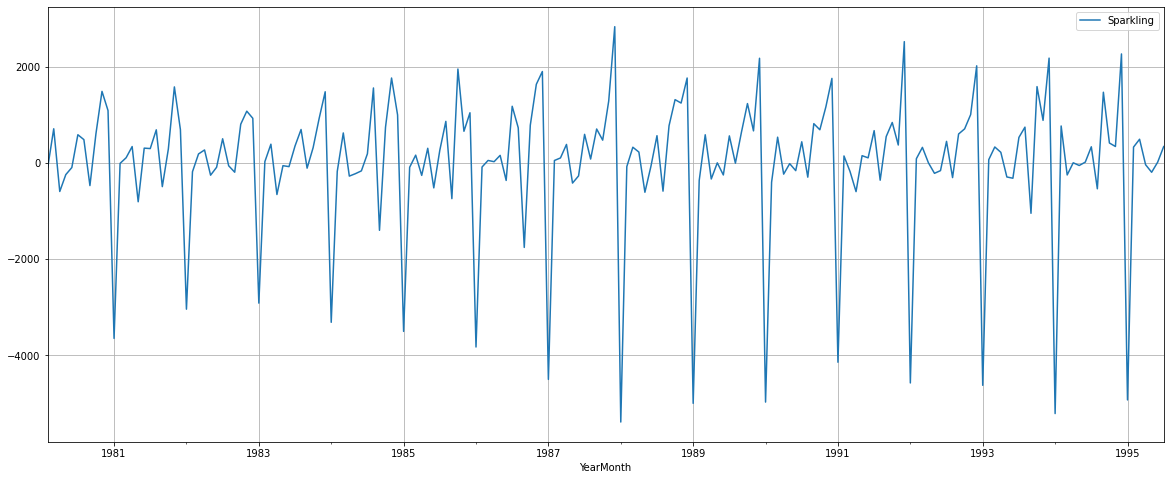

In [109]:
df_sparkling.diff().dropna().plot(grid=True);

### Split the data into train and test and plot the training and test data.
#### Training Data is till the end of 1991. Test Data is from the beginning of 1991 to the last time stamp provided.

In [110]:
df_sparkling.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [111]:
train = df_sparkling[df_sparkling.index<'1991'] 
test = df_sparkling[df_sparkling.index>='1991']

In [112]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [113]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [114]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### Check for stationarity of the Training Data Time Series.

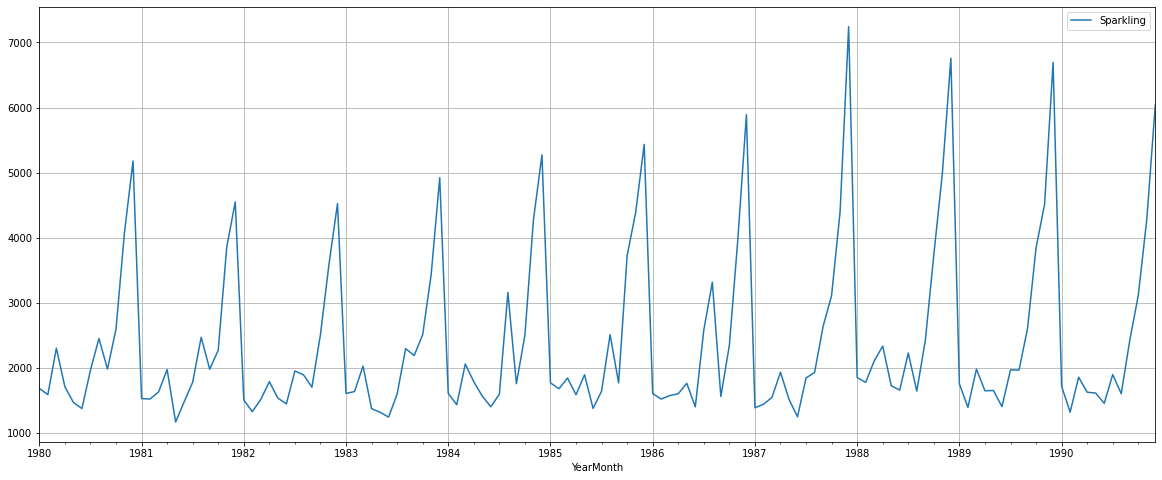

In [115]:
train.plot(grid=True);

In [116]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593717
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [117]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514579e-11
Number of lags used 11


Now, let us go ahead and plot the differenced training data.

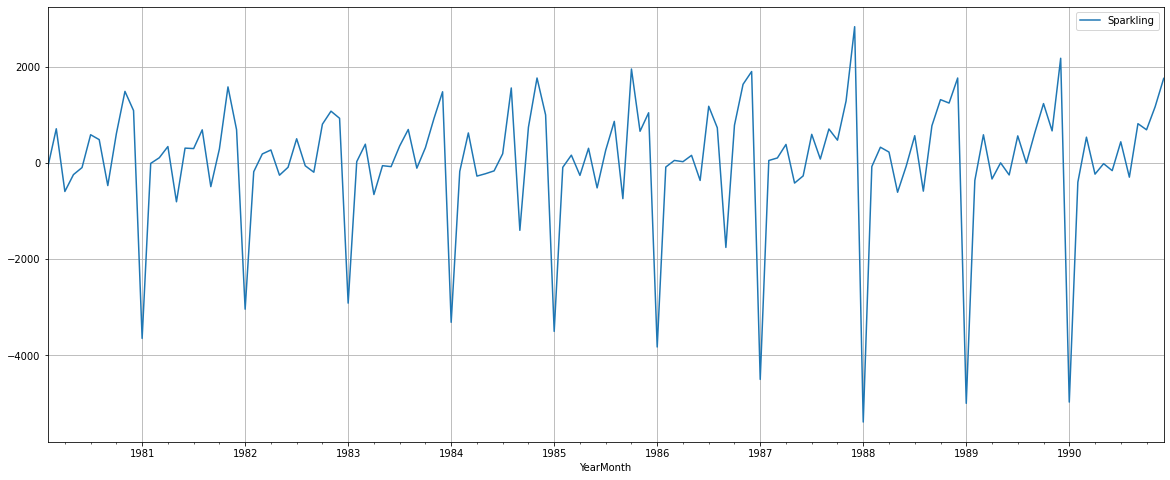

In [118]:
train.diff().dropna().plot(grid=True);

### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Q 6: Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Q 7 :Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

### Build Automated ARIMA Model

In [120]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [121]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [122]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231280847
ARIMA(0, 1, 3) - AIC:2233.994857754891
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946815218
ARIMA(1, 1, 2) - AIC:2234.5272004521566
ARIMA(1, 1, 3) - AIC:2235.6078038022133
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.77762634562
ARIMA(2, 1, 2) - AIC:2213.509212685558


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.8363546880437
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4986052031873


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.8080878060878
ARIMA(3, 1, 3) - AIC:2221.459263352943


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [123]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.459263
14  (3, 1, 2)  2230.808088
11  (2, 1, 3)  2232.836355
9   (2, 1, 1)  2233.777626

In [124]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Wed, 24 Aug 2022   AIC                           2213.509
Time:                        22:32:35   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

#### Diagnostics plot.

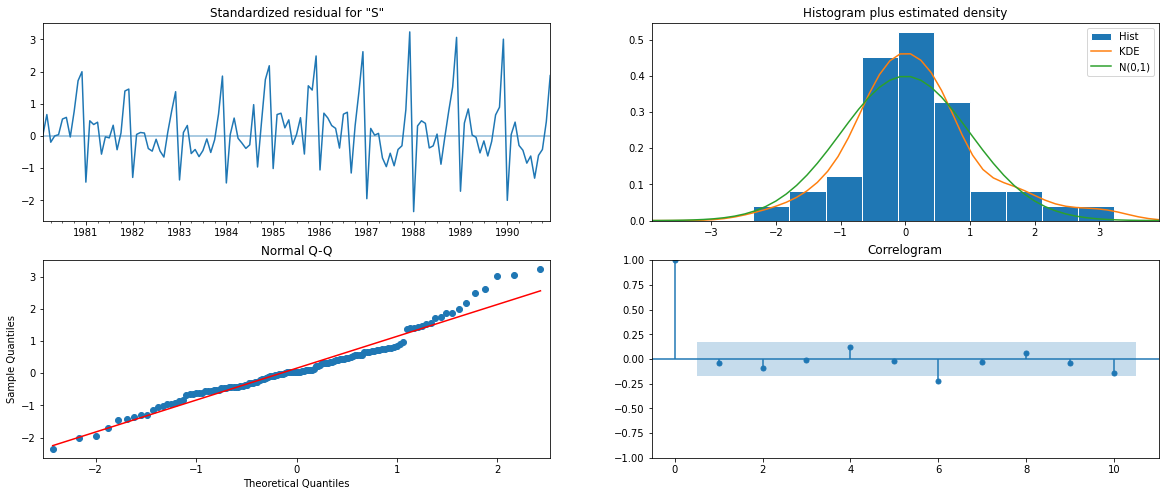

In [125]:
results_auto_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model

In [126]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [127]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [128]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.980240900083 
MAPE: 47.099874793454504


In [129]:
resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['Auto_ARIMA(2,1,2)'])

resultsDf

RMSE
Auto_ARIMA(2,1,2)  1299.980241

### Build Manual ARIMA Model

In [130]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

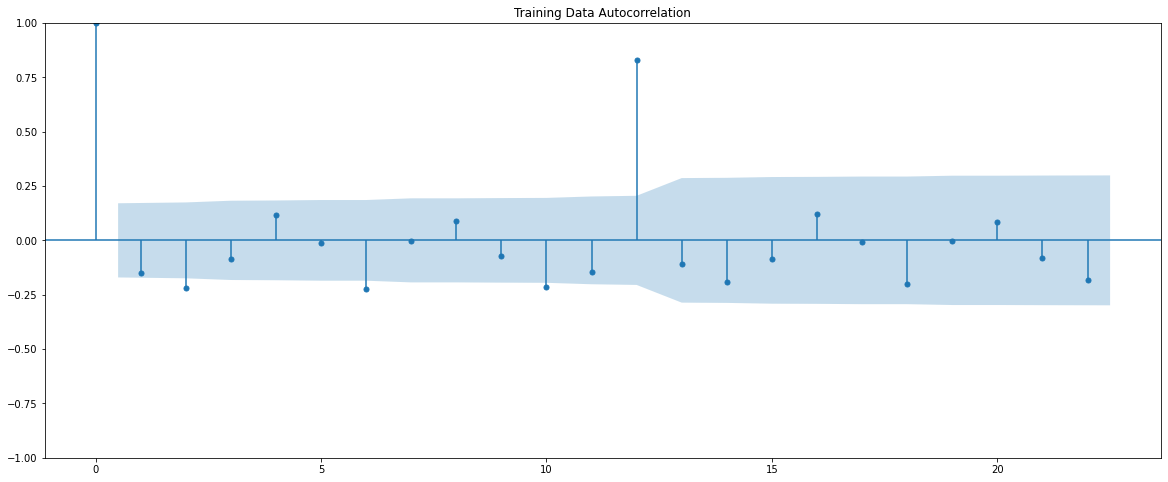

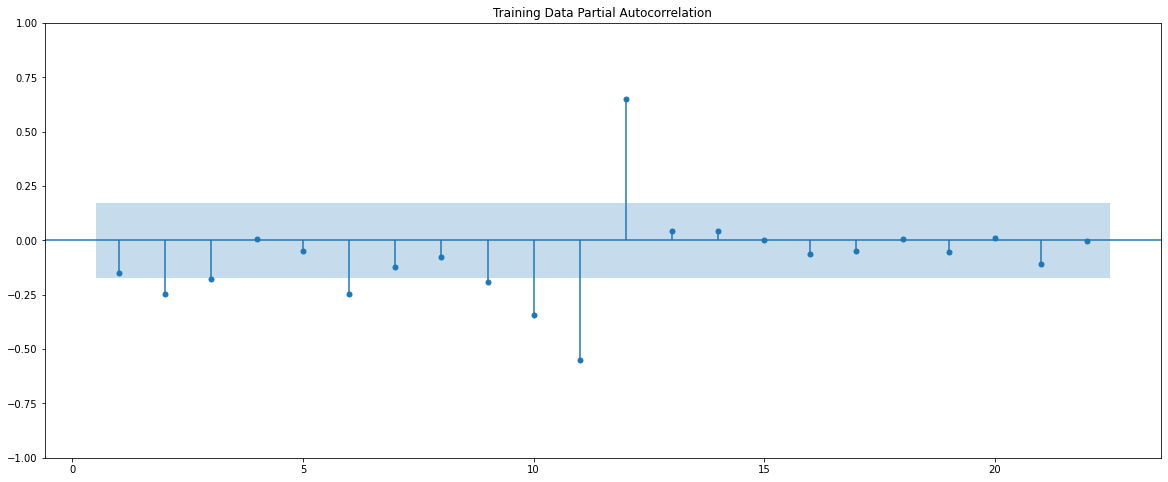

In [131]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [132]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Wed, 24 Aug 2022   AIC                           2267.663
Time:                        22:32:36   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Let us analyse the residuals from the various diagnostics plot.

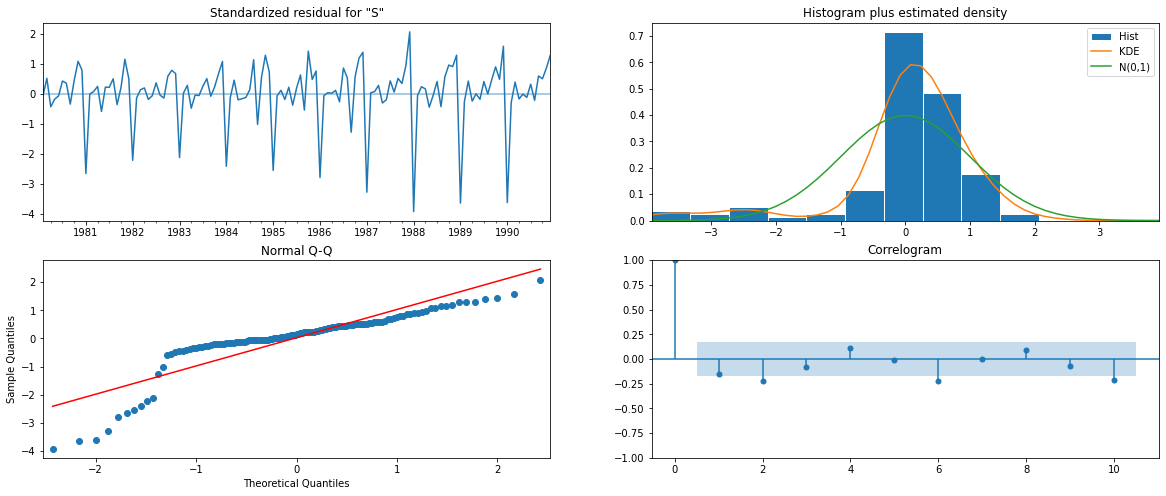

In [133]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model

In [134]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [135]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [136]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['Manual_ARIMA(0,1,0)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto_ARIMA(2,1,2)    1299.980241
Manual_ARIMA(0,1,0)  3864.279352

### Build an Manual version of a SARIMA model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

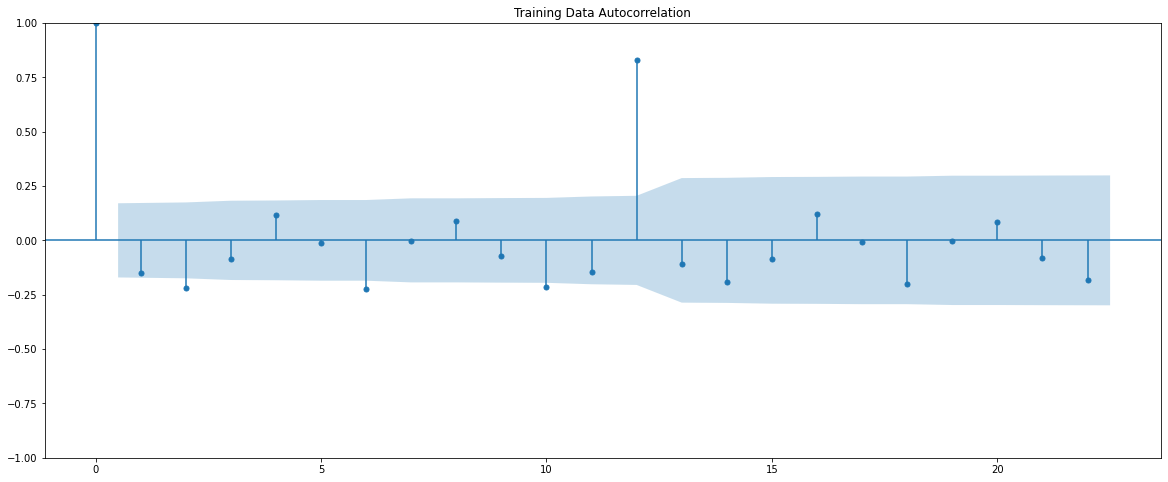

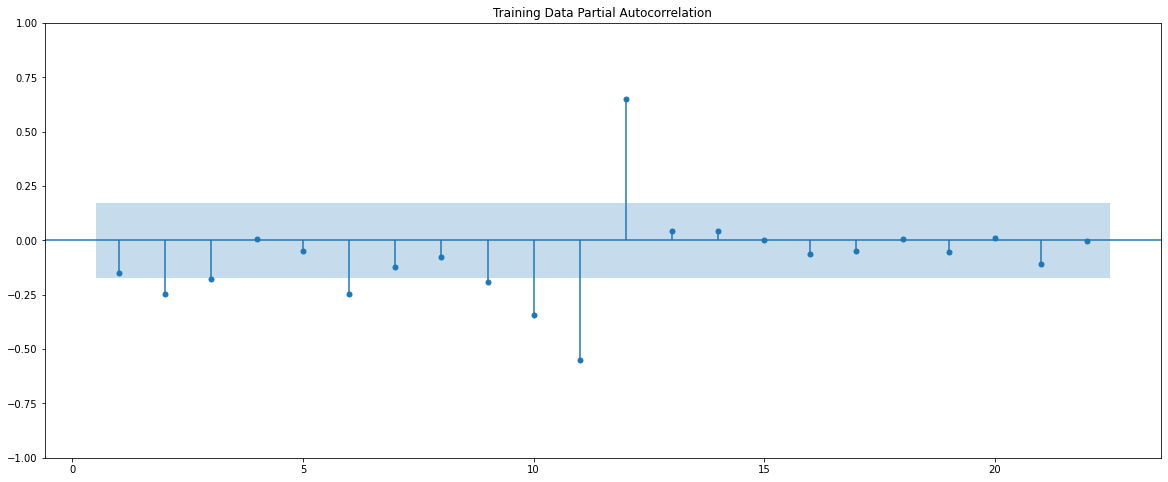

In [137]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');
plt.show()

We can see that there is a seasonality.
and P value and Q value would be 2 from above graphs

In [138]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                       SARIMAX Results                                        
Dep. Variable:                              Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 6)   Log Likelihood                -854.548
Date:                                Wed, 24 Aug 2022   AIC                           1719.096
Time:                                        22:32:38   BIC                           1732.689
Sample:                                    01-01-1980   HQIC                          1724.611
                                         - 12-01-1990                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.1528      0.267     -4.322      0.000      -1.676      -0.630
ar.

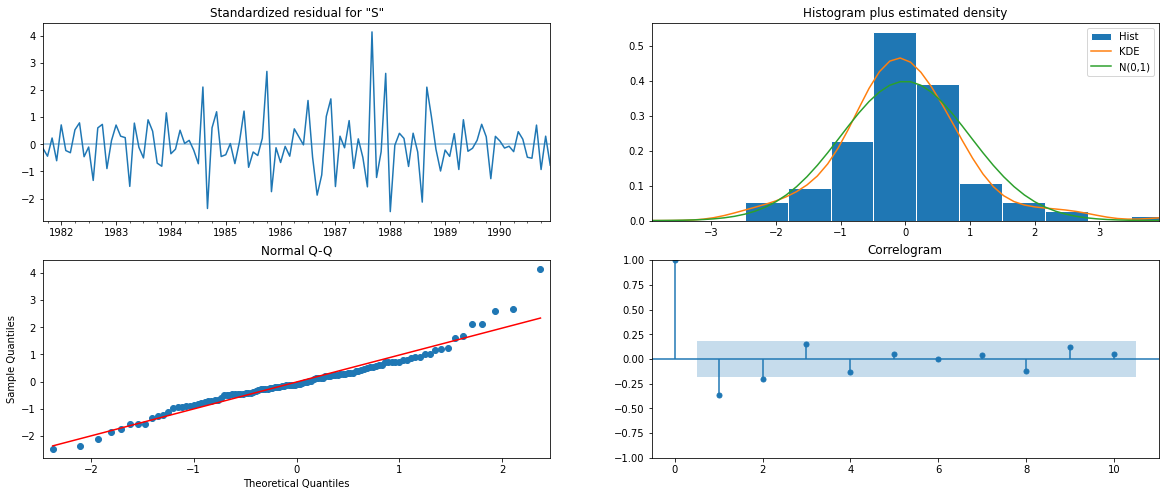

In [139]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [140]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [141]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1750.2510595324502 
MAPE: 82.17368719075145


In [142]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manual_SARIMA(0,1,0)(2,0,2,6)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto_ARIMA(2,1,2)              1299.980241
Manual_ARIMA(0,1,0)            3864.279352
manual_SARIMA(0,1,0)(2,0,2,6)  1750.251060

### Build an Automatic version of a SARIMA model

In [143]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [144]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [145]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536891406
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973418
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844431877
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123982528
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929094957186
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510389


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805656027
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549712
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155266
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.687995381675
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.448985803101
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138759652357
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.56528590828
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.18763395425
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1826.5285285351745
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429813666
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274210556
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1737.6243232836957
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104014895
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933367655
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036710327836
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:1659.240466567928
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:17

SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.0726418689658
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.110221763663
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.6058974946382
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1836.889967101092
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1715.8070745652158
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.2847973064343
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1765.1995705555055
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1729.3354898451714
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:1647.4124343751585
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:1676.12665628001
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:1675.5943198131708
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:1661.9920192067354
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:1649.2126665679
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:2171.039589277708
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:2060.2434005538094
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1871.0500763313305
SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:1782.6730511034993
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:2060.242012468675
SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:18

In [146]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
187  (2, 1, 3)  (2, 0, 3, 6)  1632.621824
59   (0, 1, 3)  (2, 0, 3, 6)  1633.327862
251  (3, 1, 3)  (2, 0, 3, 6)  1634.474632
63   (0, 1, 3)  (3, 0, 3, 6)  1635.054387
123  (1, 1, 3)  (2, 0, 3, 6)  1635.424423

In [147]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -805.311
Date:                           Wed, 24 Aug 2022   AIC                           1632.622
Time:                                   22:36:47   BIC                           1662.227
Sample:                               01-01-1980   HQIC                          1644.628
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1886      0.032    -37.062      0.000      -1.251      -1.126
ar.L2         -0.9414      0.045    -20.726

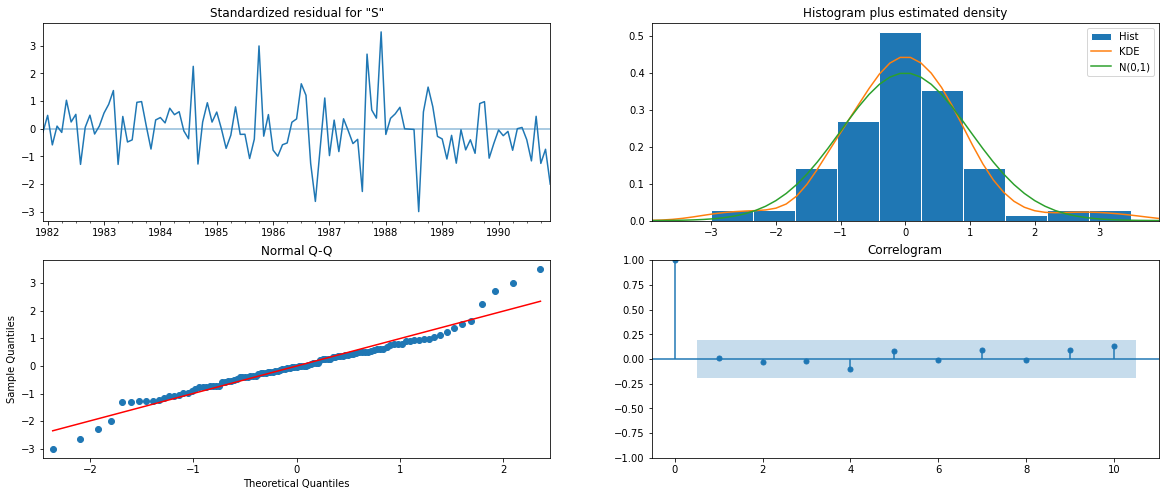

In [148]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [149]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [150]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 743.2229288149066 
MAPE: 32.480506654342875


In [151]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Auto_SARIMA(2,1,3)(2, 0, 3, 6)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
Auto_ARIMA(2,1,2)               1299.980241
Manual_ARIMA(0,1,0)             3864.279352
manual_SARIMA(0,1,0)(2,0,2,6)   1750.251060
Auto_SARIMA(2,1,3)(2, 0, 3, 6)   743.222929

## Q 8: Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [152]:
resultsDf.rename(columns = {'RMSE':'Test RMSE'}, inplace = True)

In [153]:
FInal_results = pd.concat([resultsDf,FInal_results])

In [154]:
FInal_results.sort_values(by = "Test RMSE")

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.430000
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Auto_SARIMA(2,1,3)(2, 0, 3, 6)                       743.222929
2pointTrailingMovingAverage                          813.400684
3pointTrailingMovingAverage                         1028.605756
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA(2,1,2)                                   1299.980241
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674
RegressionOnTime                                    1389.135175
manual_SARIMA(0,1,0)(2,0,2,6)                       1750.251060
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Manual_ARIMA(0,1,0)                                 3864.279352
NaiveModel                                          3864.279352

In [155]:
FInal_results_safe_copy=FInal_results.copy()

## Q 9 : Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [156]:
final_model = ExponentialSmoothing(df_sparkling,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.3)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [157]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = final_model.forecast(steps=12)

In [158]:
rmse = mean_squared_error(df_sparkling['Sparkling'],final_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 388.5276378831874


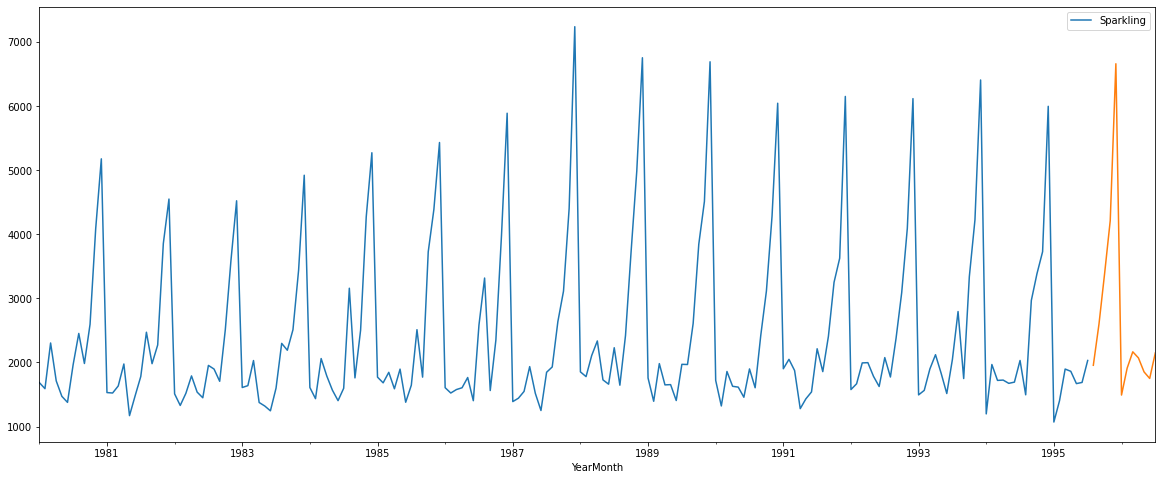

In [159]:
df_sparkling.plot()
prediction_1.plot();

In [160]:

#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(final_model.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(final_model.resid,ddof=1)})
pred_1_df.head()


lower_CI   prediction     upper_ci
1995-08-01  1192.471126  1955.959170  2719.447214
1995-09-01  1833.607745  2597.095788  3360.583832
1995-10-01  2622.596318  3386.084362  4149.572406
1995-11-01  3450.819866  4214.307910  4977.795954
1995-12-01  5899.849951  6663.337995  7426.826039

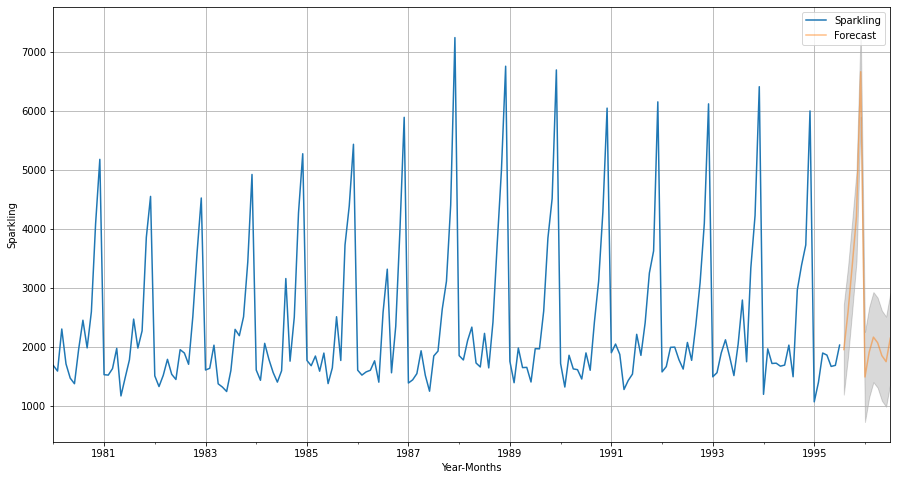

In [161]:
# plot the forecast along with the confidence band

axis = df_sparkling.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

## Q 10: Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

### Analysis about the data:

1. This sample data have 187 records , it is a Monthly data , with minimum record available for year 1980-01-01  and maximum record available for 1995-07-01 

3. this is a Sales ata for Sparkling wine product of Wine manufacturing company , with the mean sales of 2302.417 in per Month and Minimum Sales of 1070 . whereas max Sales of 7242 in any Month.

3. We have also seen that all year sales have outlier Sales in a few months of each year.

4. We have done upsampling of the data for Quarterly, yearly and a Decade sales, There are seasonality in the data, and it gets flatternout when we Upsample the data

5. We have also done Downsampling of the data for analyzing Daily Sales.

6. Correlogram, histogram, residual and quartiles were plotted.

### Forcasting analysis:

We have built 17 Models on our data and Compared all of them bassed on RMSE value for each Model:
Results with the parameters used for comparisions are as follows:

In [162]:
FInal_results.sort_values(by = "Test RMSE")

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialS...   317.430000
Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExpone...   403.706228
Auto_SARIMA(2,1,3)(2, 0, 3, 6)                       743.222929
2pointTrailingMovingAverage                          813.400684
3pointTrailingMovingAverage                         1028.605756
4pointTrailingMovingAverage                         1156.589694
SimpleAverageModel                                  1275.081804
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA(2,1,2)                                   1299.980241
Alpha=0.0496,SimpleExponentialSmoothing             1316.034674
RegressionOnTime                                    1389.135175
manual_SARIMA(0,1,0)(2,0,2,6)                       1750.251060
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1778.564670
Manual_ARIMA(0,1,0)                                 3864.279352
NaiveModel                                          3864.279352

#### It is clear that Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing	 has the lower RMSE and NaiveModel	has the hieghest RMSE value of 3864.27935